In [1]:
#import for 3D axis'
from mpl_toolkits.mplot3d import Axes3D

#import for scaling to unit variance
from sklearn.preprocessing import StandardScaler

#import for plotting
import matplotlib.pyplot as plt 

#import for linear algebra
import numpy as np 

#import for creating directory structure
import os

#import for processing csv files
import pandas as pd

#import for warning filter
import warnings

#import for pivot engineering
import scipy as sp 

#import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity



######Functions for creating Data Summaries of Results######

#Create histograms/barcharts of csv. columns data
def hist_per_col(df,nGraph,nGraphRow):

    #number of unique values in each column
    nunique = df.nunique()

    #pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]

    #number of rows in the filtered df
    nRow, nCol = df.shape

    #List filtered column names
    columnNames = list(df)

    #calculate number of rows needed for subplots
    nPlotRows = (nCol + nGraphRow - 1)//nGraphRow
 
    #create plot from matplotlib.pyplot
    plt.figure(num=None, figsize = (6 * nGraphRow, 8 * nPlotRows), dpi= 80, facecolor = 'w', edgecolor = 'k')

    #loop over each column and make subplots
    for i in range(min(nCol,nGraph)):
        
        #create subplot for ith column
        plt.subplot(nPlotRows, nGraphRow, i+1)

        #extract data from the ith column
        colDf = df.iloc[:,i]

        #if column has non numeric data plot a bar chart, otherwise a historgram
        if (not np.issubdtype(type(colDf.iloc[0]), np.number)):
            valueCount = colDf.value_counts()
            valueCount.plot.bar()
        else:
            colDf.hist()

        #set labels for subplots
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column{i})')

    #adjust layout and display plots
    plt.tight_layout(pad=1.0,w_pad = 1.0, h_pad = 1.0)
    plt.show()


#Create correlation matrix of given data
def plot_Corr_Matrix(df,graphWidth):

    #Store name of data frame 
    filename = df.dataframeName

    #only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    #drop empty columns
    df = df.dropna(axis=1)

    #filter to keeps columns that have more than 1 unique value only
    df = df[[col for col in df if df[col].nunique() > 1]]

    #make sure there are at lest 2 columns remainig in the filtered data
    if df.shape[1] < 2:
        print(f'No Correlation Plots Available:The number of non-NaN or constant columns ({df.shape[1]}) is less than 2!')
        return

    #Calcuate Correlation Matrix of Data Frame
    corr = df.corr()

    #create figure for matrix
    plt.figure(num = None, figsize = (graphWidth, graphWidth),dpi =80,facecolor='w', edgecolor='k')

    #display correlation matrix, colour coded
    corrMatrix = plt.matshow(corr,fignum = 1)

    #set x-axis labels to column names and rotate
    plt.xticks(range(len(corr.columns)), corr.columns,rotation=90)

    #set y-axis labels to column names
    plt.yticks(range(len(corr.columns)), corr.columns)

    #Move x-axis lables to the bottom
    plt.gca().xaxis.tick_bottom()

    #Add colour bar to the plot to show a coorelation scale
    plt.colorbar(corrMatrix)

    #Create Matrix Title
    plt.suptitle(f'Corelation Matrix for {filename}', fontsize = 15)

    #Display
    plt.show()


#Create Scatter and Density Plots
def plot_Scatter(df, plotSize, textSize):

    #Filter columns to only have numerical data types
    df = df.select_dtypes(include=[np.number])

    #filter for non empty value columns
    df = df.dropna(axis=1)

    #only keep columns that have more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    #list of column names in data set
    columnNames = list(df)
    
    #reduce the number of columns for matrix inversion of kernel density plots
    if len(columnNames)>10:
        columnNames = columnNames[:10]

    #Keep only selected columns in Df
    df = df[columnNames]

    #Gerenate Scatter/Density Plots
    ax = pd.plotting.scatter_matrix(df,alpha=0.75,figsize = [plotSize,plotSize], diagonal = 'kde')

    #Calculate Correlations Coefficients for DF
    corrs = df.corr().values

    #Add correlation coefficients into matrix as lables
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i,j].annotate('Corr. coef = %.3f'% corrs[i,j],(0.8,0.2),xycoords = 'axes fraction', ha ='center', va = 'center', size = textSize)

    #Create Plot Title
    plt.title('Scatter and Density Plot')

    #Display
    plt.show()


There are 1000 rows and 7 columns


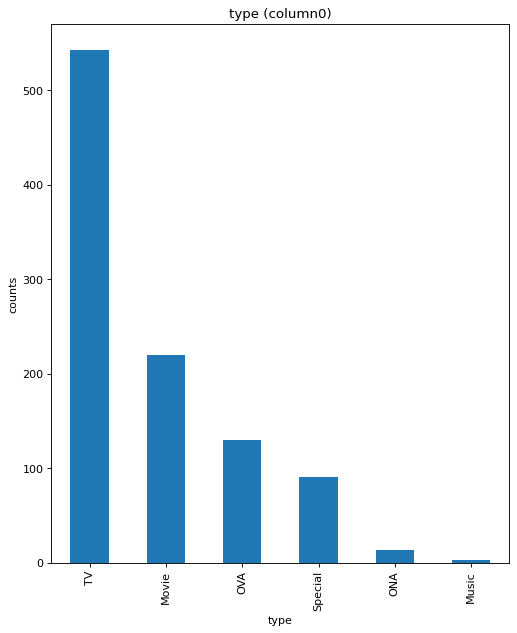

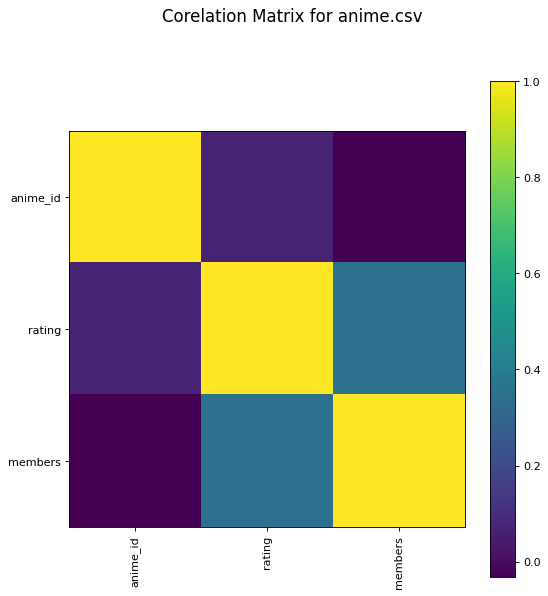

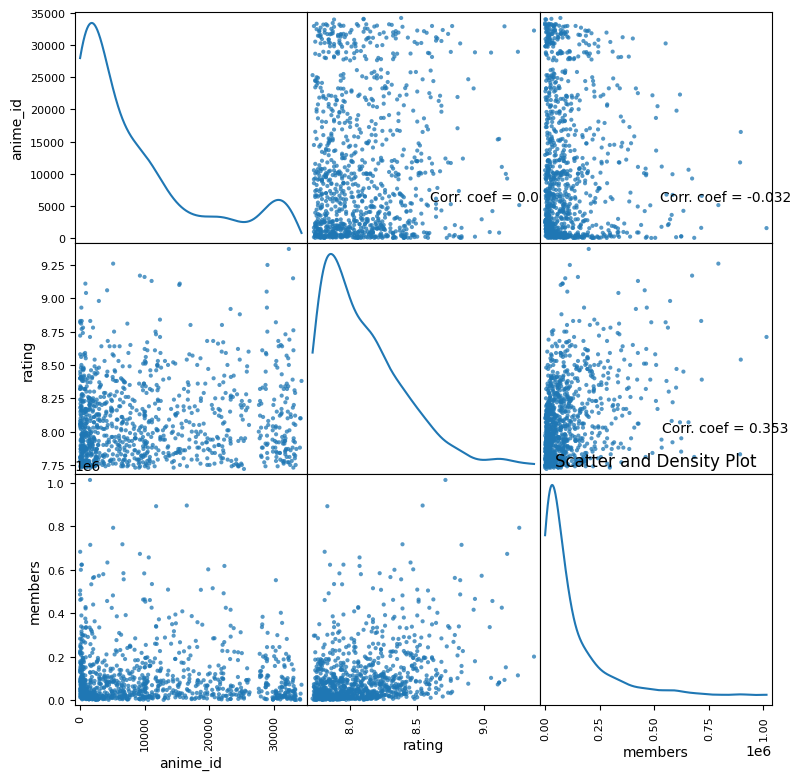

In [2]:
#Check anime.csv data set
nRowsRead = 1000
df1 = pd.read_csv('anime.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'anime.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

#Check data
df1.head(5)

#Display the plots of the ddf1
hist_per_col(df1, 10, 5)
plot_Corr_Matrix(df1,8)
plot_Scatter(df1, 9, 10)

There are 1000 rows and 3 columns


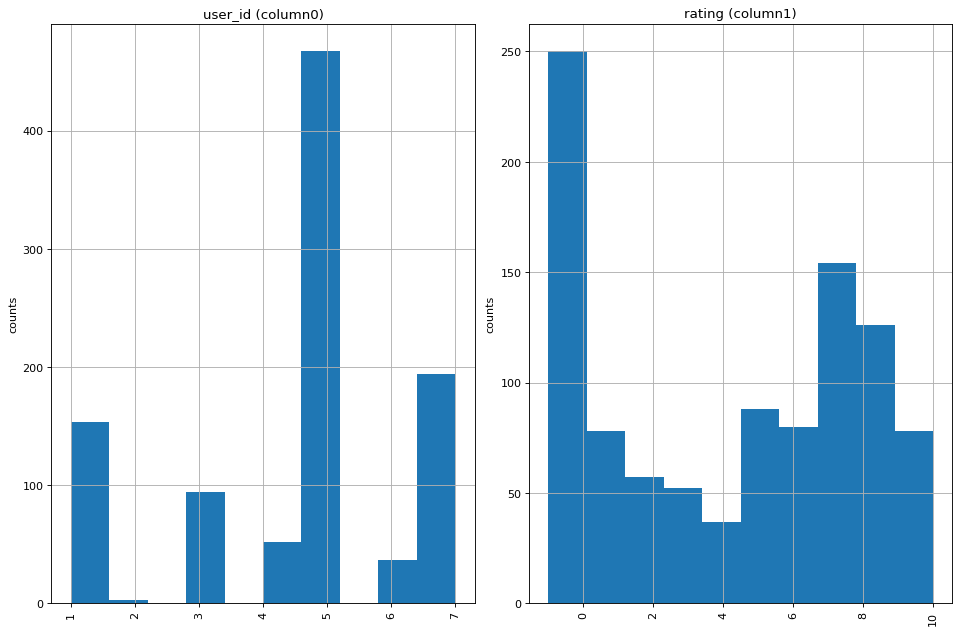

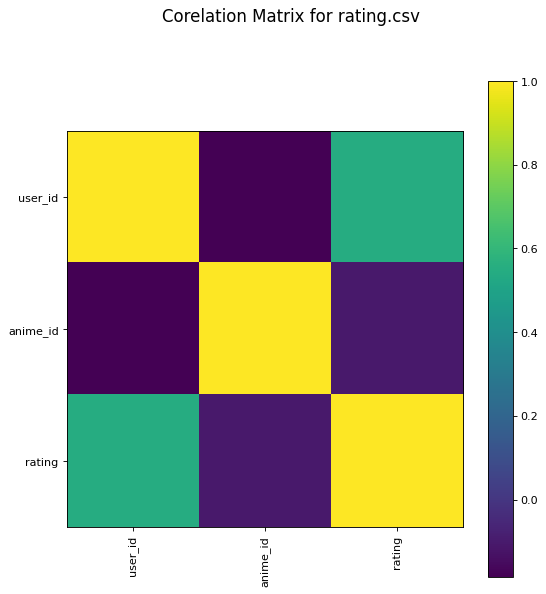

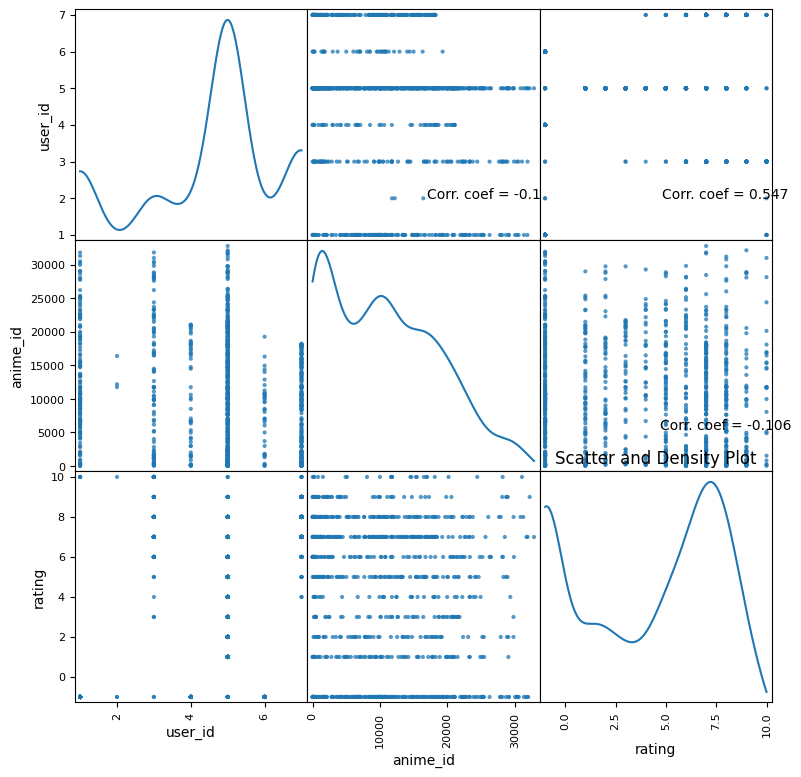

In [3]:
#Check rating.csv data set
nRowsRead = 1000
df2 = pd.read_csv('rating.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'rating.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

#Check data
df2.head(5)

#Display the plots of the ddf1
hist_per_col(df2, 10, 5)
plot_Corr_Matrix(df2,8)
plot_Scatter(df2, 9, 10)

In [4]:
########## Anime recommendation #########

#defualt theme and settings for data frame
pd.options.display.max_columns

#warning handles
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

#new defines of each csv
rating_df = pd.read_csv('rating.csv', delimiter=',')
anime_df = pd.read_csv('anime.csv', delimiter=',')

####Cleaning up Data#####

#removing all 0 rating animes
anime_df = anime_df[~np.isnan(anime_df["rating"])]

#Removing all empty values
anime_df['genre'] = anime_df['genre'].fillna(anime_df['genre'].dropna().mode().values[0])
anime_df['type'] = anime_df['type'].fillna(anime_df['type'].dropna().mode().values[0])

#check all are filled
anime_df.isnull().sum()

#Filling values that have NaN inputs
rating_df['rating'] = rating_df['rating'].apply(lambda x: np.nan if x == -1 else x)

#For recommendations, we want:
#1. we want to recommend anime series'; so only consider TV types
#2. we want to make a new df combing anime and rating df's on the anime_id column
#3. only keep columns user_id, name, rating 

#Step 1: only include TV types in Df
anime_df = anime_df[anime_df['type'] == 'TV']

#Step 2: combine anime df and rating df about the ainme_id column
rated_anime = rating_df.merge(anime_df, left_on = 'anime_id', right_on = 'anime_id', suffixes = ['_user',''])

#Step 3: drop all extra columns
rated_anime = rated_anime[['user_id','name','rating']]

#for computing, we will only use the first 10000 users data
rated_anime_cut = rated_anime[rated_anime.user_id <= 10000]


##### Create Pivot table of users as rows and Shows as columns to help with calcuations####
pivot = rated_anime_cut.pivot_table(index=['user_id'],columns=['name'],values='rating')

#We want to clean up our recommendations via pivot table by:
#1. Normalizing all values (making them between 0 and 1)
#2. replacing all NaN values w 0
#3. transposing the pivot table
#4. dropping columns with value 0 (that is unrated)
#5. convert table to sparse matrix format for calcutrons

#Step 1: normalizing values
pivot_n = pivot.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

#Step 2: replacin NaN values w 0 
pivot_n.fillna(0,inplace=True)

#Step 3: transpose table
pivot_n = pivot_n.T

#Step 4: drop unrated columns
pivot_n = pivot_n.loc[:,(pivot_n != 0).any(axis = 0)]

#Step 5: convert to sparce matrix using scipy package
piv_sparse = sp.sparse.csr_matrix(pivot_n.values)



In [5]:
##### Calculations for recommendations: Cosine Similarity Model #######

#Measures similarity between 2 vectors of an inner poduct spaxe
#use this to check if the cosine of the angle between two vectors (input for our matrix/pivot table) are in the same direction

#establishing anime similarity using cosine similarity
anime_similarity = cosine_similarity(piv_sparse)

#turn the data into a data frame:
anime_sim_df = pd.DataFrame(anime_similarity, index = pivot_n.index, columns = pivot_n.index)

##### Define function to return top 5 recommendations based on similarity, given an input anime #########

def recommendation(anime_name):
    '''
    Purpose: returns top 5 shows similar to the inputed anime show using cosine value and shows a percentage of the match

    Example:
    input => recommendation('Death Note')
    Ouput => Recommended because you watched Death Notes:
              #1 Code Geass: Hangyaku no Lelouch, 55.8% match
              #2 Code Geass: Hangyaku no Lelouch R2, 53.13% match
              #3 Fullmetal Alchemist, 50.36% match
              #4 Shingeki no Kyojin, 47.11% match
              #5 Fullmetal Alchemist: Brotherhood, 44.56% match
    '''
    try: 
        num = 1
        print('Recommended because you watched {}:\n'.format(anime_name))
        for anime in anime_sim_df.sort_values(by = anime_name, ascending = False).index[1:6]:
            print(f'#{num}:{anime}, {round(anime_sim_df[anime][anime_name]*100,2)}% match')
            num +=1
    except KeyError:
        print("Sorry, this series is not in our directory")

recommendation('Hunter x Hunter')
recommendation('Fullmetal Alchemist: Brotherhood')
recommendation('Fullmetal Alchemist')
recommendation('Death Note')
recommendation('Haikyuu!!')


Recommended because you watched Hunter x Hunter:

#1:Hajime no Ippo, 32.04% match
#2:Slam Dunk, 31.13% match
#3:Yuu☆Yuu☆Hakusho, 29.32% match
#4:Fullmetal Alchemist, 28.67% match
#5:Hikaru no Go, 27.84% match
Recommended because you watched Fullmetal Alchemist: Brotherhood:

#1:Steins;Gate, 49.11% match
#2:Code Geass: Hangyaku no Lelouch R2, 49.09% match
#3:Code Geass: Hangyaku no Lelouch, 48.34% match
#4:Death Note, 44.56% match
#5:Shingeki no Kyojin, 44.5% match
Recommended because you watched Fullmetal Alchemist:

#1:Death Note, 50.36% match
#2:Code Geass: Hangyaku no Lelouch, 48.55% match
#3:Code Geass: Hangyaku no Lelouch R2, 46.16% match
#4:Neon Genesis Evangelion, 44.75% match
#5:Fullmetal Alchemist: Brotherhood, 44.08% match
Recommended because you watched Death Note:

#1:Code Geass: Hangyaku no Lelouch, 55.8% match
#2:Code Geass: Hangyaku no Lelouch R2, 53.13% match
#3:Fullmetal Alchemist, 50.36% match
#4:Shingeki no Kyojin, 47.11% match
#5:Fullmetal Alchemist: Brotherhood, 44